# 2D UMAP

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler')
    .as_posix()
)

os.chdir(path)
sys.path.append(path)

In [2]:
import warnings

from numba import NumbaDeprecationWarning

warnings.simplefilter(
    'ignore', 
    NumbaDeprecationWarning
)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

from datatype.dataset import Dataset
from datatype.spectrogram import flatten
from umap import UMAP

In [ ]:
plt.style.use('science')

In [17]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [5]:
dataframe = dataframe.sample(n=1000, random_state=42)

In [6]:
spectrogram = dataframe['filter_array'].tolist()
spectrogram = flatten(spectrogram)

In [7]:
metrics = ['euclidean', 'manhattan', 'minkowski', 'mahalanobis']
min_dists = [0.0, 0.1]
neighbors = [5, 10, 15, 20, 25]

result = []

for min_dist in min_dists:
    for n_neighbors in neighbors:
        um = UMAP(
            low_memory=True,
            metric='minkowski',
            n_neighbors=n_neighbors, 
            min_dist=min_dist
        )
        
        embedding = um.fit_transform(spectrogram)
        
        result.append(
            (min_dist, n_neighbors, embedding)
        )

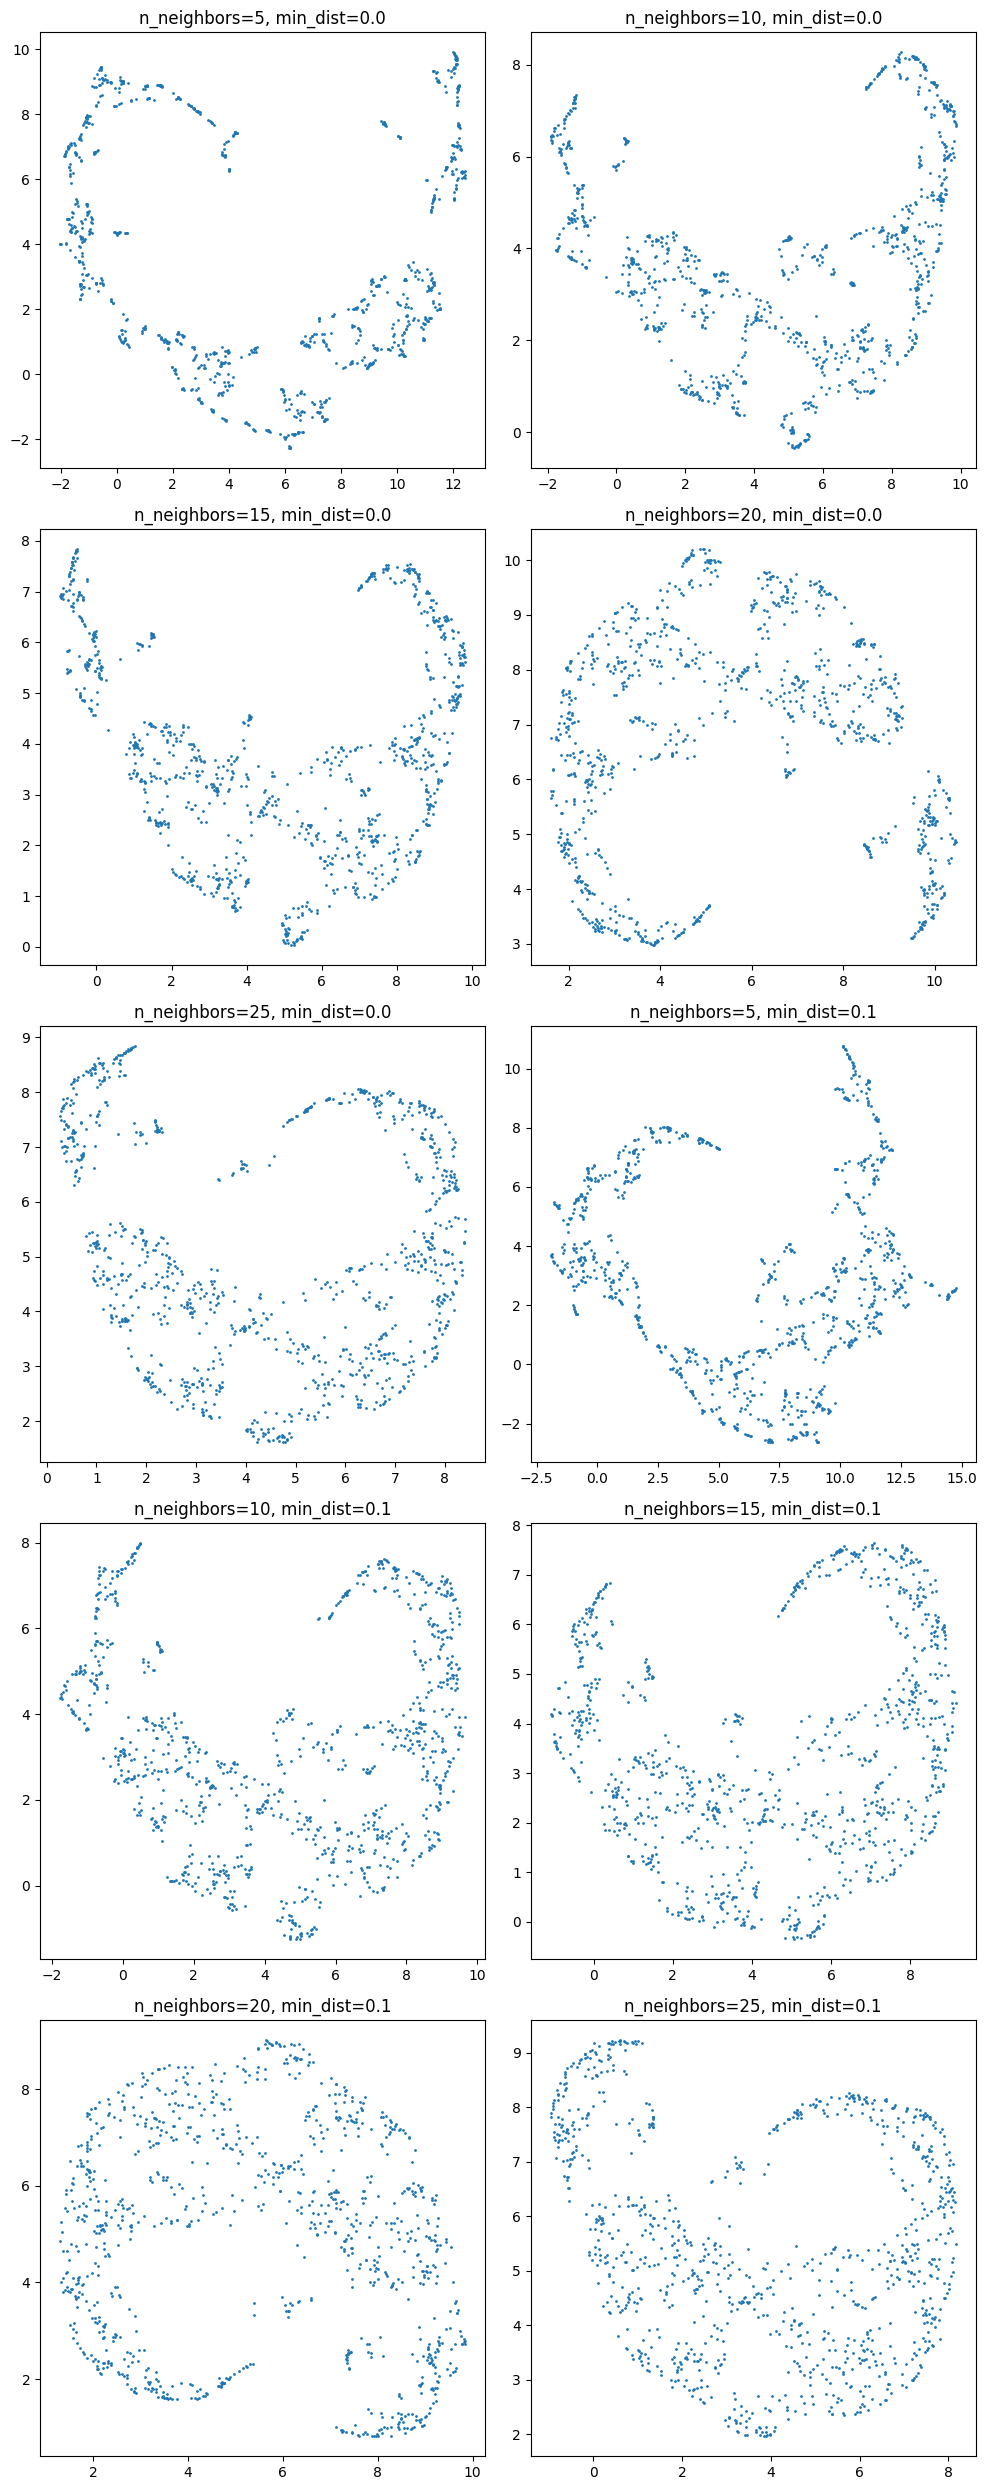

In [8]:
nrows = len(neighbors)
ncols = len(min_dists)

figsize = (5 * ncols, 5 * nrows)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

for i, (d, n, embedding) in enumerate(result):
    row = i // ncols
    col = i % ncols
    
    ax = axes[row, col]
    
    ax.scatter(
        embedding[:, 0], 
        embedding[:, 1], 
        s=1
    )
    
    ax.set_title(f'n_neighbors={n}, min_dist={d}')

plt.tight_layout()
plt.show()
plt.close()